In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_14568\1155983238.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('./data.txt')
data.columns = ["x", "y", "target"]
data.head(10)

,x,y,target
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1
8,84.432820,43.533393,1
9,95.861555,38.225278,0


In [4]:
# Normalize the dataset
for column in data.columns[:-1]:
    data[column] = (data[column] - data[column].mean()) / data[column].std()

data.head(10)

,x,y,target
0,-1.848041,-1.191476,0
1,-1.559952,0.364798,0
2,-0.299192,1.084066,1
3,0.677397,0.495824,1
4,-1.081459,-0.525054,0
5,-0.251318,1.631464,1
6,0.469751,-1.048817,1
7,0.525395,1.143727,1
8,0.957165,-1.210877,1
9,1.549266,-1.495664,0


In [6]:
X_train = data[["x", "y"]].values
y_train = data["target"].values

(99,)


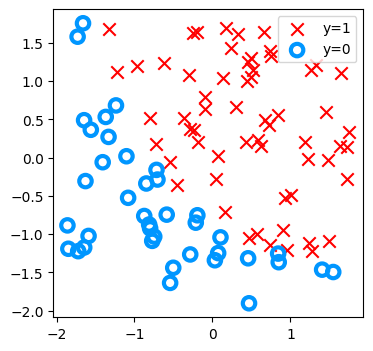

In [7]:
pos_label="y=1"
neg_label="y=0"
fig, model = plt.subplots(1,1,figsize=(4,4))

positive = y_train == 1
negative = y_train == 0
print(positive.shape)

# Plot examples
model.scatter(X_train[positive, 0], X_train[positive, 1], marker='x', s=80, c = 'red', label=pos_label)
model.scatter(X_train[negative, 0], X_train[negative, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
model.legend(loc='best' )

model.figure.canvas.toolbar_visible = False
model.figure.canvas.header_visible = False
model.figure.canvas.footer_visible = False

In [8]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0 / (1.0 + np.exp(-z))
    return np.clip(g, 1e-15, 1 - 1e-15)

In [9]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [10]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

1.389471001735264


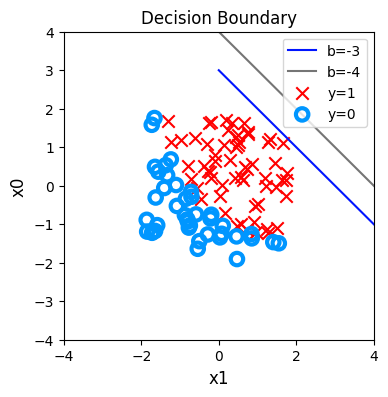

In [11]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,model = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
model.plot(x0,x1, c='#0015ff', label="b=-3")
model.plot(x0,x1_other, c='#757575', label="b=-4")
model.axis([0, 4, 0, 4])

# Plot the original data

model.scatter(X_train[positive, 0], X_train[positive, 1], marker='x', s=80, c = 'red', label=pos_label)
model.scatter(X_train[negative, 0], X_train[negative, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
model.legend(loc='best' )

model.figure.canvas.toolbar_visible = False
model.figure.canvas.header_visible = False
model.figure.canvas.footer_visible = False

model.axis([-4, 4, -4, 4])
model.set_ylabel('x0', fontsize=12)
model.set_xlabel('x1', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [12]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  1.389471001735264
Cost for b = -4 :  1.9342005823772377


In [13]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    
    return w, b, J_history

In [15]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)

print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.678119310455579   
Iteration 1000: Cost 0.21139186862883944   
Iteration 2000: Cost 0.20592303577566734   
Iteration 3000: Cost 0.20490795701004233   
Iteration 4000: Cost 0.20465640670977325   
Iteration 5000: Cost 0.20458664287542344   
Iteration 6000: Cost 0.20456623572207702   
Iteration 7000: Cost 0.20456010081090806   
Iteration 8000: Cost 0.20455822941523724   
Iteration 9000: Cost 0.20455765401821985   

updated parameters: w:[3.92213911 3.72212083], b:1.75570692192007


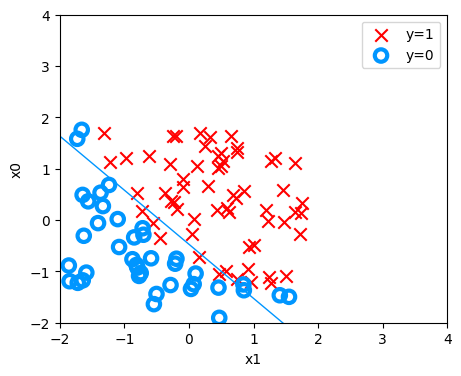

In [16]:
fig, model = plt.subplots(1, 1, figsize=(5, 4))

# Plot the original data
model.set_ylabel(r'x0')
model.set_xlabel(r'x1')
model.axis([-2, 4, -2, 4])

# Plot examples
model.scatter(X_train[positive, 0], X_train[positive, 1], marker='x', s=80, c='red', label=pos_label)
model.scatter(X_train[negative, 0], X_train[negative, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
model.legend(loc='best')

model.figure.canvas.toolbar_visible = False
model.figure.canvas.header_visible = False
model.figure.canvas.footer_visible = False

# Plot the decision boundary
x0_values = np.linspace(-2, 4, 100)
x1_values = -b_out/w_out[1] - (w_out[0]/w_out[1]) * x0_values

model.plot(x0_values, x1_values, c='#0096ff', lw=1)
plt.show()